In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
from pandas_datapackage_reader import read_datapackage
from shortcountrynames import to_name

In [3]:
df = read_datapackage("https://github.com/openclimatedata/edgar-co2-emissions")

In [4]:
unit = df.metadata["schema"]["fields"][-1]["unit"]
unit

'kt'

In [5]:
df.head()

Emissions
Code Name        Sector                      Year           
AFG  Afghanistan Transport                   1970   503.4713
                 Other industrial combustion 1970   128.9440
                 Buildings                   1970   641.5890
                 Non-combustion              1970   457.8263
                 Power Industry              1970    10.4453

In [6]:
df = df.reset_index().drop("Name", axis=1).set_index(["Code", "Sector", "Year"]).sort_index()
df.head()

Emissions
Code Sector    Year           
ABW  Buildings 1970   0.090406
               1971   0.090664
               1972   0.098132
               1973   0.098482
               1974   0.094293

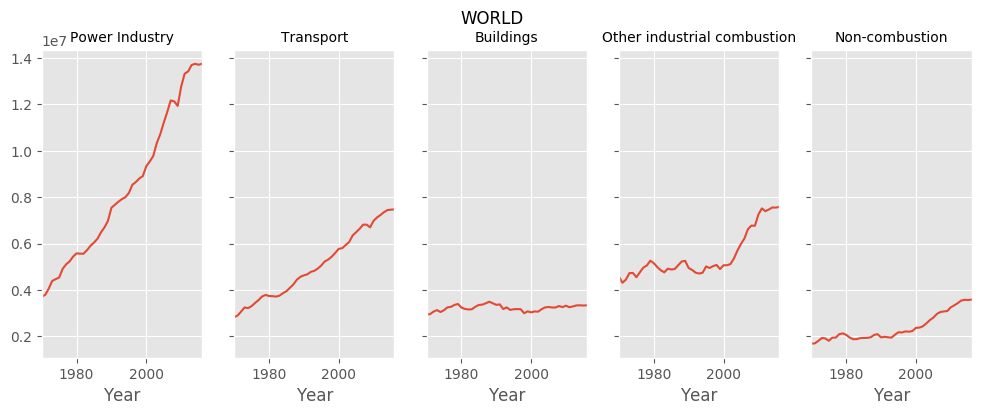

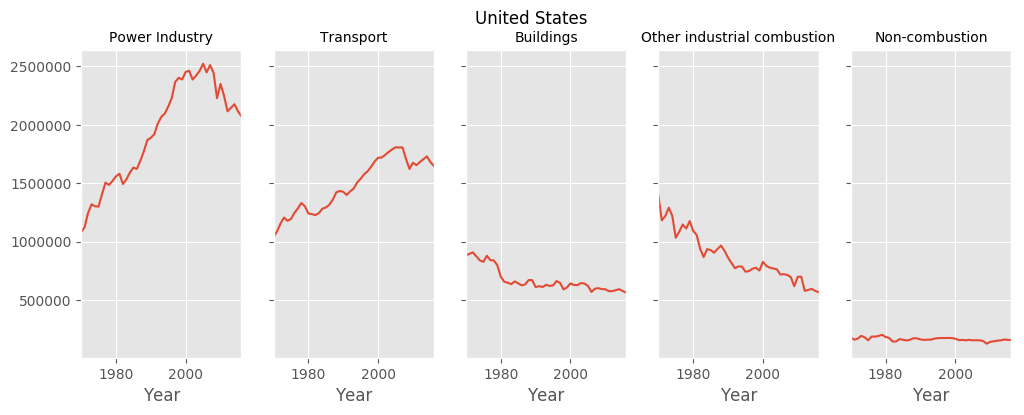

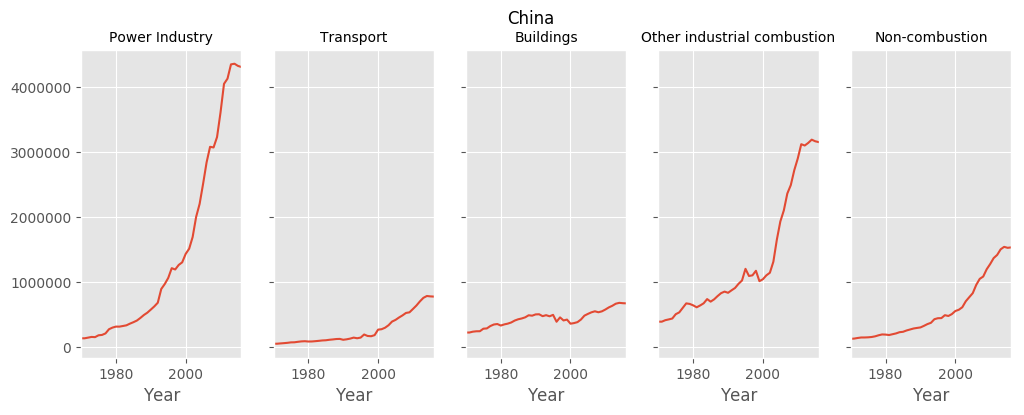

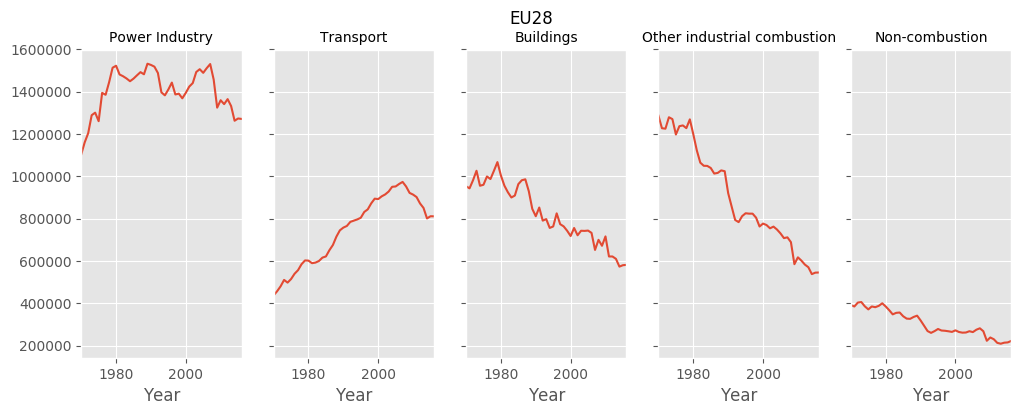

In [7]:
for code in ["WORLD", "USA", "CHN", "EU28"]:
    grouped = df.loc[code].reset_index().set_index("Year").groupby("Sector")["Emissions"]

    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,4), sharey=True)
    try:
        name = to_name(code)
    except KeyError:
        name = code
    fig.suptitle(name)
    sectors = ['Power Industry', 'Transport', 'Buildings', 'Other industrial combustion', 'Non-combustion']
    for (key, ax) in zip(sectors, axes):
        ax.set_title(key,  fontsize=10)
        grouped.get_group(key).plot(ax=ax, legend=False)
        plt.ylabel(unit)